<a href="https://colab.research.google.com/github/Bayodecode/Bayodecode/blob/main/Convolution_assignment_PHY_661_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
from scipy import signal

In [11]:
 ## One Dimension -- table * table
min_ = -10; max_ = 10.
npt = 100
cut = 5
xs = np.linspace(min_, max_, npt)
table1 = np.where(np.abs(xs) <= cut,2,0)
table2 = np.where(np.abs(xs) <= 1,2,0)
conv = np.convolve(table1, table2, 'same')
conv = np.divide(conv, npt)

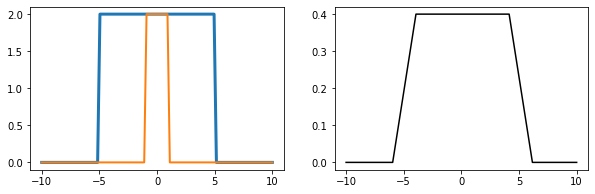

In [7]:
fig,ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(xs, table1, lw=3)
ax[0].plot(xs, table2, lw=2)
ax[1].plot(xs, conv, c='k')

In [9]:
## One Dimension -- Table * Gaussian
min_ = -10; max_ = 10.
npt = 100
xs = np.linspace(min_, max_, npt)
table = np.where(np.abs(xs) <= 1,1,0)
x0 = 0.
sig = 1.
gauss = np.exp(-(xs-x0)**2 / (2*sig**2))
conv = np.convolve(table, gauss, 'same')
#conv /= npt

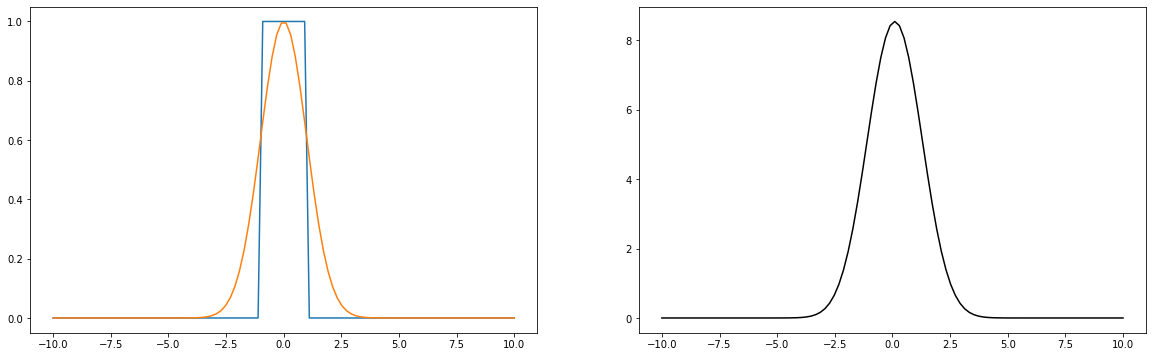

In [10]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(xs, table)
ax[0].plot(xs, gauss)
ax[1].plot(xs,conv, c='k')

In [12]:
## Two Dimension -- rect * gaussian
min_ = -10.; max_ = 10.
npt = 200
cut = 5
xs = np.linspace(min_, max_, npt); ys = np.linspace(min_, max_, npt)
X,Y = np.meshgrid(xs, ys)
ids_x = np.where(np.abs(xs) <= cut); ids_y = np.where(np.abs(ys) <= cut)
table = np.zeros((npt,npt))
table[np.min(ids_x):np.max(ids_x),np.min(ids_y):np.max(ids_y)] = 1
x0 = 0.; y0 = 0.
sig = 2.
gauss = np.zeros(table.shape)
gauss = np.exp(-((X-x0)**2 + (Y-y0)**2) / (2*sig**2))
conv = signal.convolve2d(table, gauss, 'same')

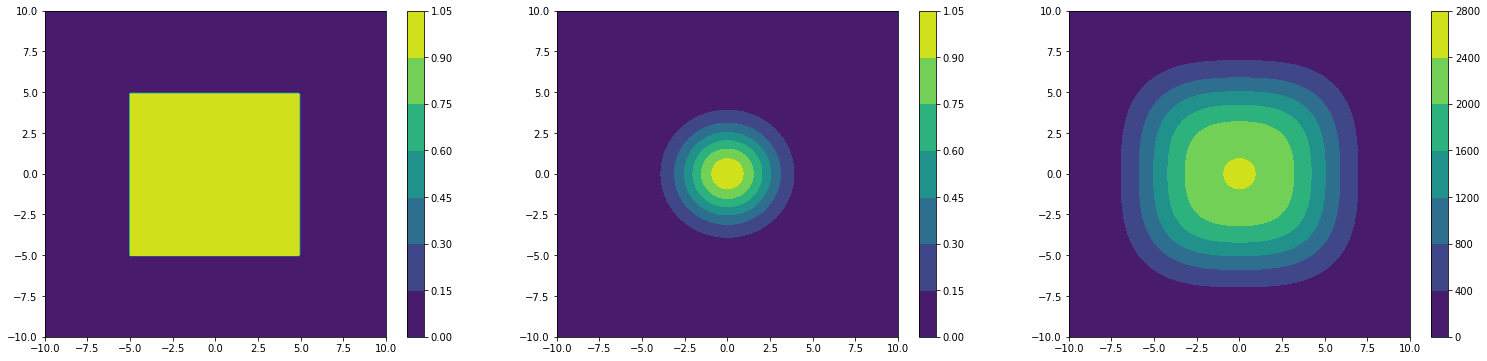

In [13]:
fig,ax = plt.subplots(1,3,figsize=(26,6))
c = ax[0].contourf(X,Y, table)
plt.colorbar(c, ax=ax[0])
c = ax[1].contourf(X,Y, gauss)
plt.colorbar(c, ax=ax[1])
c = ax[2].contourf(X,Y, conv)
plt.colorbar(c, ax=ax[2])